In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_economic_index.csv')
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [6]:
df.drop(columns=['year','month'],axis=1,inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


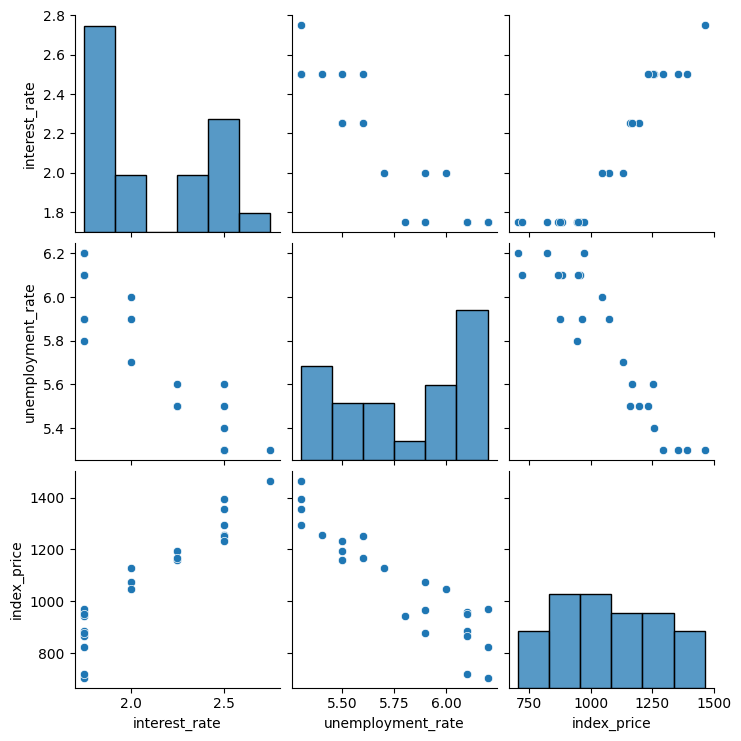

In [11]:
sns.pairplot(df)

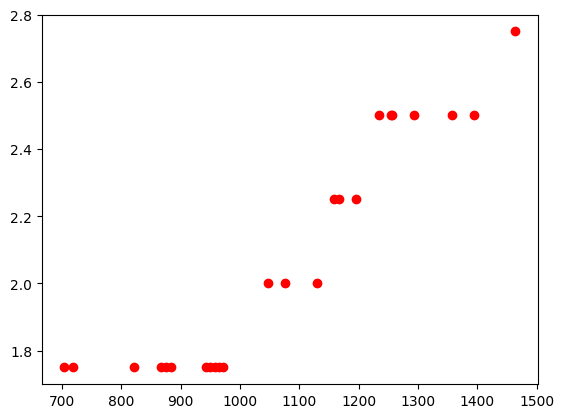

In [13]:
plt.scatter(df['index_price'],df['interest_rate'],color='r')

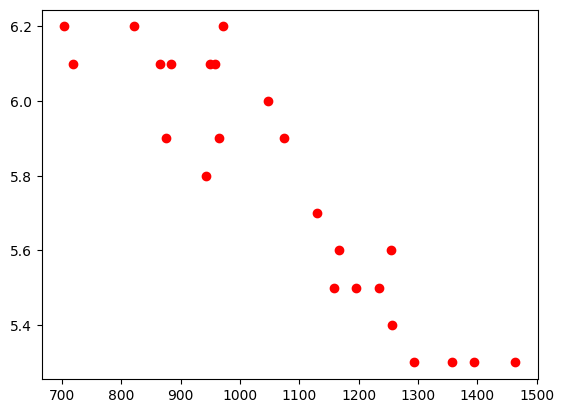

In [14]:
plt.scatter(df['index_price'],df['unemployment_rate'],color='r')

In [15]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
print(X.shape)
print(Y.shape)

(24, 2)
(24,)


In [16]:
## Train_Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [26]:
print(X_train.shape)
print(Y_train.shape)

(18, 2)
(18,)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

In [19]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [20]:
from sklearn.model_selection import cross_val_score
validation = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [21]:
validation

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [23]:
validation_mean = np.mean(validation)
print(validation_mean)

-5914.828180162386


In [24]:
print('Slope: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Slope:  [  88.27275507 -116.25716066]
Intercept:  1053.4444444444443


In [29]:
Y_predict_test = regression.predict(X_test)

In [30]:
## Performance MEtrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(Y_test,Y_predict_test)
mse = mean_squared_error(Y_test,Y_predict_test)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

59.935781523235484
5793.762887712569
76.11677139574805


In [32]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_predict_test)
print(score)

0.8278978091457145


In [33]:
### Display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7131630152428576

In [34]:
## Residuals

residuals = Y_test - Y_predict_test
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


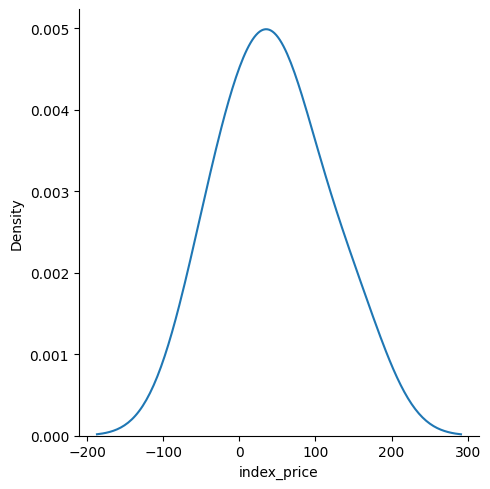

In [35]:
sns.displot(residuals,kind='kde')

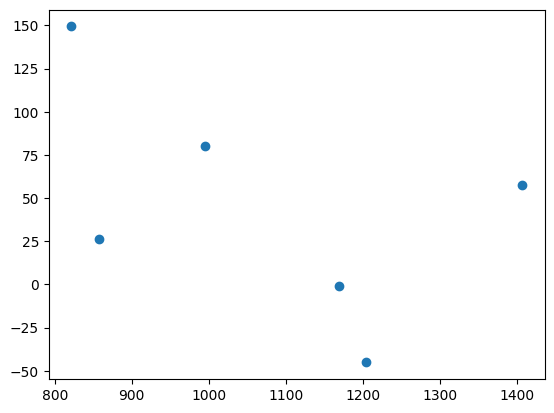

In [38]:
plt.scatter(Y_predict_test,residuals)

In [37]:
print('slopes: ',regression.coef_)
print('Intercept: ', regression.intercept_)

slopes:  [  88.27275507 -116.25716066]
Intercept:  1053.4444444444443


In [39]:
### OLS Linear regression

import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()
model.summary()

e:\Krish Naik\PY_ML_NLP\FeatureEngineering\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 14 Jun 2025   Prob (F-statistic):                       0.754
Time:                        08:48:08   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""